In [1]:
import os
import re
import pandas as pd
from datetime import datetime
import numpy as np

DATA_DIR = "./attendance_csv"  # <-- replace with your folder name


In [ ]:
def parse_filename(filename):
    """
    Extract class number and date from filename.
    Handles duplicates (..._v2).
    Returns (class_number, date, is_duplicate).
    """
    base = filename.replace(".csv", "")
    
    # Pattern for ClassX_YYYY-MM-DD or ClassX_YYYY-MM-DD_v2
    match = re.match(r"Class(\d+)_(\d{4}-\d{2}-\d{2})(?:_(v\d+))?$", base)
    
    if not match:
        return None, None, False
    
    class_num = int(match.group(1))
    date_str = match.group(2)
    duplicate_flag = match.group(3) is not None
    
    date = datetime.strptime(date_str, "%Y-%m-%d").date()
    
    return class_num, date, duplicate_flag

# Load files
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".csv")]

records = []
for f in files:
    class_num, date, is_dup = parse_filename(f)
    if class_num is None:
        print(" Skipped unrecognized file:", f)
        continue
    records.append({
        "filename": f,
        "class_number": class_num,
        "date": date,
        "duplicate": is_dup
    })

file_df = pd.DataFrame(records)
file_df.sort_values("class_number", inplace=True)
file_df.reset_index(drop=True, inplace=True)



In [8]:
file_df

,filename,class_number,date,duplicate
0,Class1_2025-08-19.csv,1,2025-08-19,False
1,Class2_2025-08-21.csv,2,2025-08-21,False
2,Class3_2025-08-26.csv,3,2025-08-26,False
3,Class4_2025-08-28.csv,4,2025-08-28,False
4,Class5_2025-09-02.csv,5,2025-09-02,False
5,Class6_2025-09-04.csv,6,2025-09-04,False
6,Class7_2025-09-09.csv,7,2025-09-09,False
7,Class8_2025-09-11.csv,8,2025-09-11,False
8,Class9_2025-09-16.csv,9,2025-09-16,False
9,Class10_2025-09-18.csv,10,2025-09-18,False


In [4]:
file_df[["class_number","date"]]

,class_number,date
0,1,2025-08-19
1,2,2025-08-21
2,3,2025-08-26
3,4,2025-08-28
4,5,2025-09-02
5,6,2025-09-04
6,7,2025-09-09
7,8,2025-09-11
8,9,2025-09-16
9,10,2025-09-18


In [6]:
# Detect duplicates (same class number appears multiple times)
duplicate_summary = (
    file_df[file_df.duplicate == True]
    .groupby("class_number")
    .size()
)

missing_classes = [c for c in range(1, 28) if c not in file_df.class_number.unique()]

duplicate_summary, missing_classes


(class_number
 25    1
 dtype: int64,
 [23])

In [21]:
pd.to_datetime("2025-08-16", format="%Y-%m-%d").date()

datetime.date(2025, 8, 16)

In [45]:
all_data = []

for _, row in file_df.iterrows():
    df = pd.read_csv(os.path.join(DATA_DIR, row.filename))
    # Normalize date format from mm/dd/yyyy → datetime.date
    df["ParsedDate"] = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce").dt.date
    
    df["ClassNumber"] = row.class_number
    df["ClassDate"] = row.date
    df["Duplicate"] = row.duplicate
    
    all_data.append(df)

master_df = pd.concat(all_data, ignore_index=True)

master_df.head()


,number,name,username,class,date,ParsedDate,ClassNumber,ClassDate,Duplicate
0,1,Lilian Lamb,llamb,Class 1,8/19/2025,NaT,1,2025-08-19,False
1,2,Luke Peter,mp79,Class 1,8/19/2025,NaT,1,2025-08-19,False
2,3,Gavin Orme,Gorme,Class 1,8/19/2025,NaT,1,2025-08-19,False
3,4,Charlie Gomman,gormance,Class 1,8/19/2025,NaT,1,2025-08-19,False
4,5,Kyle Hix,khix,Class 1,8/19/2025,NaT,1,2025-08-19,False


In [48]:
clean_df = master_df.copy()

for dup_class in file_df[file_df.duplicate].class_number.unique():
    versions = master_df[master_df["ClassNumber"] == dup_class]

    # Compare attendance sizes
    counts = versions.groupby("Duplicate").size()

    # If v2 smaller → drop v2
    if counts.get(True, 0) < counts.get(False, 0):
        clean_df = clean_df[~((clean_df.ClassNumber == dup_class) & (clean_df.Duplicate == True))]
    else:
        clean_df = clean_df[~((clean_df.ClassNumber == dup_class) & (clean_df.Duplicate == False))]

clean_df.shape


(871, 9)

In [49]:
attendance = (
    clean_df.groupby(["ClassNumber", "ClassDate"])
    .size()
    .reset_index(name="AttendanceCount")
)

attendance.sort_values("ClassNumber", inplace=True)
attendance


,ClassNumber,ClassDate,AttendanceCount
0,1,2025-08-19,44
1,2,2025-08-21,49
2,3,2025-08-26,45
3,4,2025-08-28,30
4,5,2025-09-02,40
5,6,2025-09-04,40
6,7,2025-09-09,42
7,8,2025-09-11,34
8,9,2025-09-16,33
9,10,2025-09-18,31


In [50]:
class_list = attendance[["ClassNumber", "ClassDate"]]
print(class_list)


    ClassNumber   ClassDate
0             1  2025-08-19
1             2  2025-08-21
2             3  2025-08-26
3             4  2025-08-28
4             5  2025-09-02
5             6  2025-09-04
6             7  2025-09-09
7             8  2025-09-11
8             9  2025-09-16
9            10  2025-09-18
10           11  2025-09-28
11           12  2025-09-25
12           13  2025-09-30
13           14  2025-10-02
14           15  2025-10-07
15           16  2025-10-14
16           17  2025-10-16
17           18  2025-10-21
18           19  2025-10-23
19           20  2025-10-28
20           21  2025-10-30
21           22  2025-11-04
22           24  2025-11-11
23           25  2025-11-13
24           26  2025-11-18
25           27  2025-11-20


In [51]:
median_attendance = attendance["AttendanceCount"].median()
print(median_attendance)


33.0


In [81]:
low = attendance["AttendanceCount"].min()
high = attendance["AttendanceCount"].max()

low_date = attendance.loc[attendance["AttendanceCount"] == low, "ClassDate"].iloc[0]
high_date = attendance.loc[attendance["AttendanceCount"] == high, "ClassDate"].iloc[0]

print("Lowest attendance of", low, "students on", low_date)
print("Highest attendance of", high, "students on", high_date)

Lowest attendance of 14 students on 2025-11-20 00:00:00
Highest attendance of 49 students on 2025-08-21 00:00:00


In [75]:
evaluation_dates = {
    datetime(2025, 10, 7).date(): "Quiz 2",
    datetime(2025, 11, 11).date(): "Quiz 3",
    datetime(2025, 11, 18).date(): "Presentations"
}

attendance["IsEvaluation"] = attendance["ClassDate"].isin(evaluation_dates.keys())
attendance["EvaluationType"] = attendance["ClassDate"].map(evaluation_dates)

attendance_eval = attendance[attendance.IsEvaluation]
attendance_eval


C:\Users\shrut\AppData\Local\Temp\ipykernel_50992\1899654761.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  attendance["IsEvaluation"] = attendance["ClassDate"].isin(evaluation_dates.keys())


,ClassNumber,ClassDate,AttendanceCount,IsEvaluation,EvaluationType
14,15,2025-10-07,45,True,Quiz 2
22,24,2025-11-11,41,True,Quiz 3
24,26,2025-11-18,34,True,Presentations


In [76]:
attendance_eval.loc[attendance_eval.AttendanceCount.idxmax()]


ClassNumber                         15
ClassDate          2025-10-07 00:00:00
AttendanceCount                     45
IsEvaluation                      True
EvaluationType                  Quiz 2
Name: 14, dtype: object

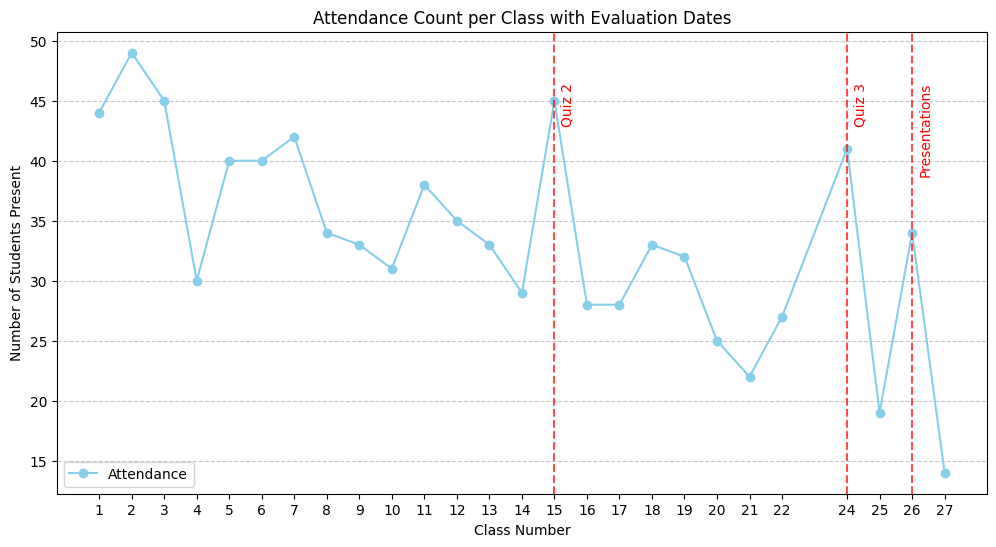

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure ClassNumber is integer and sorted
attendance['ClassNumber'] = attendance['ClassNumber'].astype(int)
attendance['ClassDate'] = pd.to_datetime(attendance['ClassDate'])
attendance = attendance.sort_values('ClassNumber')

# Define evaluation dates
evaluation_dates = {
    "Quiz 2": pd.to_datetime("2025-10-07"),
    "Quiz 3": pd.to_datetime("2025-11-11"),
    "Presentations": pd.to_datetime("2025-11-18")
}

# Find ClassNumber corresponding to each evaluation date
eval_class_numbers = {}
for name, date in evaluation_dates.items():
    closest_class = attendance.iloc[(attendance['ClassDate'] - date).abs().argsort()[0]]['ClassNumber']
    eval_class_numbers[name] = closest_class

# Plot line with markers
plt.figure(figsize=(12,6))
plt.plot(attendance['ClassNumber'], attendance['AttendanceCount'], marker='o', linestyle='-', color='skyblue', label='Attendance')

# Add vertical lines for evaluation dates
for eval_name, class_num in eval_class_numbers.items():
    plt.axvline(x=class_num, color='red', linestyle='--', alpha=0.7)
    plt.text(class_num + 0.2, max(attendance['AttendanceCount']) * 0.95, eval_name, rotation=90, color='red', verticalalignment='top')

plt.xlabel('Class Number')
plt.ylabel('Number of Students Present')
plt.title('Attendance Count per Class with Evaluation Dates')
plt.xticks(attendance['ClassNumber'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
